In [1]:
import os
from pydicom import dcmread
import matplotlib.pyplot as plt

In [4]:
path = r'C:\Users\tdelg\OneDrive\Desktop\No_Name\015101_Alxn1840Wd205 - 695575972\MRE_4sl__401'
output = r'N:\2_Analysis\automated_analysis\dcm_edits\401_MRE'

In [5]:
ds = dcmread(os.path.join(path, 'IM-0001-0032.dcm'))
arr = ds.pixel_array

arr.shape

(32, 320, 320)

In [29]:
dcm = dcmread(r'N:\2_Analysis\_Research\Loomba\GOLD-MINE\_Completed\GLD_0261_20220415_3547\Mri_Abdomen_WO_Contrast - 9012\MRE_fGRE_OW_4_sl_60HZ_4\IM-0004-0023.dcm')

In [20]:
'ImageLocation' in ds

False

In [31]:
dcm[0x18, 0x1310]

(0018, 1310) Acquisition Matrix                  US: [256, 0, 0, 80]

In [4]:
flip_angle = ds[0x2001, 0x1023]
te = ds[0x2001, 0x1025]
tr = ds[0x2005, 0x1030]
sop_id = ds[0x0008, 0x0018]
sop_id_pre = sop_id[:-3]

print('te:         ', te)
print('tr:         ', tr)
print('flip angle: ', flip_angle)
print('sop ID:     ', sop_id)
print('sop ID pre: ', sop_id_pre)

te:          (2001, 1025) [Echo Time Display MR]              SH: '1.15/2.3'
tr:          (2005, 1030) [Repetition Time]                   FL: [119.9988021850586, 0.0]
flip angle:  (2001, 1023) [Flip Angle Philips]                DS: '10.0'
sop ID:      (0008, 0018) SOP Instance UID                    UI: 1.3.46.670589.11.42400.5.20.1.1.8044.2022042010524690200
sop ID pre:  1.3.46.670589.11.42400.5.20.1.1.8044.2022042010524690


In [6]:
rep_time = ds[0x2005, 0x1030][0]
echo_time = 1.15
flip_angle = 10
echo_nums = [1, 2] * 27

for i in range(arr.shape[0]):
    echo_num = echo_nums[i]
    
    im_arr = arr[i,:,:]
    
    ds.PixelData = im_arr.tobytes()
    ds.NumberOfFrames = 1
    del ds.NumberOfFrames
    
    ds.EchoTime = str(round(echo_num * echo_time, 2))
    ds.RepetitionTime = rep_time
    
    ds.FlipAngle = flip_angle
    
    ds.EchoNumbers = echo_num 
    
    ds.SOPInstanceUID = sop_id_pre + str(i+1).zfill(3)
    
    ds.InstanceNumber = i+1
    
    ds.save_as(os.path.join(output, 'IM-0002-' + str(i+1).zfill(4) + '.dcm'))

In [45]:
arr = ds.pixel_array
arr.shape

(162, 256, 256)

In [5]:
im_arr = arr[0,:,:]
im_arr.shape

(256, 256)

<function matplotlib.pyplot.show(close=None, block=None)>

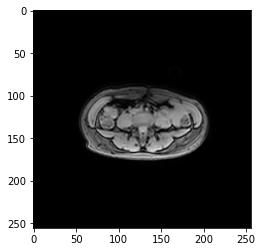

In [6]:
plt.imshow(im_arr,cmap='gray')
plt.show

In [7]:
ds.PixelData = im_arr.tobytes()

In [8]:
ds.NumberOfFrames = 1

In [9]:
'EchoTime' in ds

False

In [23]:
ds.EchoTime = 1.15

In [24]:
ds['EchoTime']

(0018, 0081) Echo Time                           DS: '1.15'

In [25]:
'RepetitionTime' in ds

False

In [26]:
ds.RepetitionTime = ds[0x2005, 0x1030][0]

In [27]:
ds['RepetitionTime']

(0018, 0080) Repetition Time                     DS: '119.99960327148438'

In [28]:
'FlipAngle' in ds

False

In [36]:
flip_angle = ds[0x2001, 0x1023]
print(flip_angle)

(2001, 1023) [Flip Angle Philips]                DS: '10.0'


In [37]:
ds.FlipAngle = 10

In [38]:
ds['FlipAngle']

(0018, 1314) Flip Angle                          DS: '10.0'

In [31]:
'EchoNumbers' in ds

False

In [32]:
ds.EchoNumbers = 5

In [33]:
ds['EchoNumbers']

(0018, 0086) Echo Number(s)                      IS: '5'

In [16]:
ds.save_as('test.dcm')